<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/01_regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [271]:

X=np.arange(-100.0,100.0,4)
y=X+10
print(X)

[-100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.  -56.
  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.   -8.
   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.   40.
   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.   88.
   92.   96.]


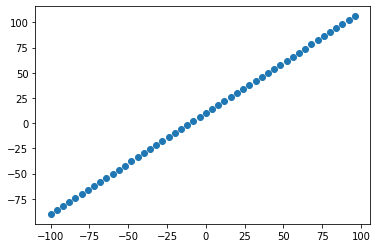

In [272]:
plt.scatter(X,y)
plt.show()

### Prepare 3 sets

* train -70-80 %
* val 10-15 %
* test 10-15 %


In [273]:
### How many samples we have
print(len(X))

50


In [274]:
def split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42):
  N=len(X)
  train_size=1.0-test_size-val_size
  N_train=N*train_size
  N_val=N*val_size
  N_test=N*test_size

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,shuffle=shuffle)
  
  corrected_val_size=N_val/(N_val+N_train) # corrected value is scaled cause of the first split

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=corrected_val_size, random_state=random_state,shuffle=shuffle)

  return X_train,X_val, X_test, y_train, y_val, y_test


In [275]:
def plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred):
  plt.figure(figsize=(10,7))


  # Plot training data in blue
  plt.scatter(X_test,y_test,c='g',label='Test data')

  # Plot training data in blue
  plt.scatter(X_test,y_pred,c='r',label='Predicted data')
  plt.legend();

In [276]:
X_train,X_val, X_test, y_train, y_val, y_test=split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42)
print(len(X_train))
print(len(X_val))
print(len(X_test))


35
10
5


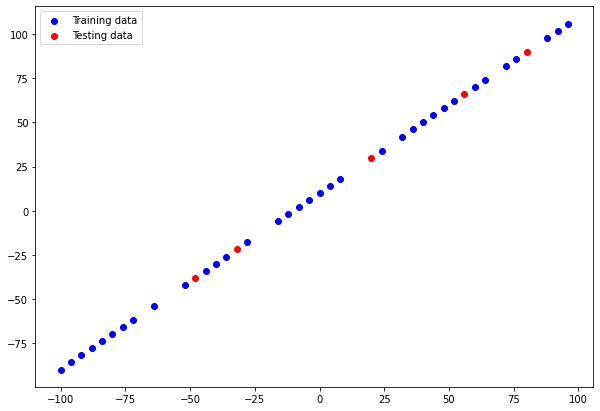

In [277]:
# Visualise the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c='b', label="Training data")
plt.scatter(X_test, y_test,c='r', label="Testing data")
# Show a legend
plt.legend()

In [278]:
model=tf.keras.Sequential(name='Model1')
model.add(tf.keras.layers.Dense(5,input_shape=[1],name='Dense1'))
model.add(tf.keras.layers.Dense(1,name='Output'))
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 5)                 10        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


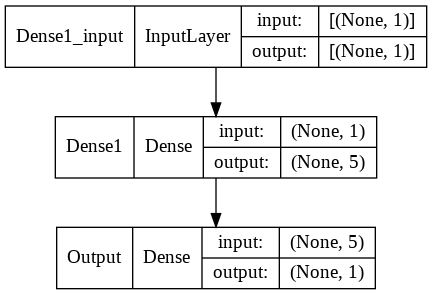

In [279]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [280]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [281]:
model.fit(x=X_train,y=y_train,
          batch_size=None,
          epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 79.2760 - mae: 79.2760
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 75.1580 - mae: 75.1580
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 70.9295 - mae: 70.9295
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 66.7945 - mae: 66.7945
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 62.3861 - mae: 62.3861
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 58.1989 - mae: 58.1989
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 53.9422 - mae: 53.9422
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 49.5409 - mae: 49.5409
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 45.2402 - mae: 45.2402
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 40.8219 - mae: 40.8219
Epoch 11/100
2/2 [==============================] - 0s 7ms

In [282]:
y_pred=model.predict(x=X_test)

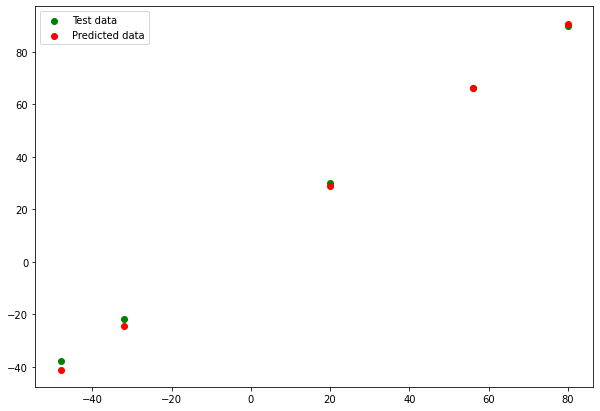

In [283]:
plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred)

In [284]:
# evaluate model
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 92ms/step - loss: 1.5035 - mae: 1.5035


[1.503483533859253, 1.503483533859253]